# Equivalent layer technique for estimating total magnetization direction using regular grid

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'regular_EQL_magdirection_RM.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_polyprism.pickle') as f:
        model_polyprism = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/regular_grid.pickle') as f:
        reg_grid = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_reg = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (reg_grid['area'][1], 
                                                                                                reg_grid['area'][0],
                                                                                                reg_grid['area'][3],
                                                                                                reg_grid['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### reg_grid survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% reg_grid['shape'] 
print 'Number of data: %.1f' % reg_grid['N']
print 'dx: %.1f m' % reg_grid['dx']
print 'dy: %.1f m ' % reg_grid['dy']

Shape : (25,25)
Number of data: 625.0
dx: 500.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_polyprism['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 30.0 degree
Main field declination: 30.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_polyprism['m_R']
print 'Inclination: %.1f degree' % model_polyprism['inc_R']
print 'Declination: %.1f degree' % model_polyprism['dec_R']

Intensity: 5.0 A/m
Inclination: 55.0 degree
Declination: 45.0 degree


In [16]:
inc_R,dec_R = model_polyprism['inc_R'],model_polyprism['dec_R']

## Generating the layer with my function 

In [17]:
h = 750.

#### Generating a layer

In [18]:
shape_layer = (reg_grid['shape'][0],reg_grid['shape'][1])

In [19]:
xs,ys,zs = regular(reg_grid['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-5
eps_i = 1e-5

In [25]:
mu_pos = 1e3

In [26]:
m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
    data['tfa_obs_polyprism_RM_reg'],reg_grid['x'],reg_grid['y'],
    reg_grid['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
    it_marq,eps_e,eps_i,mu_pos)

i = 0
1.00742508752e-13
-0.210132528641 0.367291206321
0.311058121136
i = 1
1.0452053232e-13
8.32988972582 5.10328371292
0.514556689723
i = 2
1.06268289881e-13
13.4944216503 7.63907944874
0.339309815377
i = 3
1.08220552799e-13
17.2036799273 9.60974482045
0.242903616022
i = 4
1.10200402535e-13
20.0054047195 11.2757739997
0.181368131266
i = 5
1.12020394039e-13
22.2543045775 12.7544802851
0.146930209026
i = 6
1.13665171009e-13
24.1147624446 14.072502906
0.122270706503
i = 7
1.15129512826e-13
25.7023952475 15.2783632862
0.106219703738
i = 8
1.1644596617e-13
27.086740515 16.4198534698
0.0957625114578
i = 9
1.1764393386e-13
28.3028140512 17.5028037792
0.0868814726249
i = 10
1.18729671861e-13
29.3802564729 18.5345069701
0.0795926353859
i = 11
1.19713706019e-13
30.3401287376 19.5129071184
0.0730491160492
i = 12
1.20603374438e-13
31.1990803364 20.4288625623
0.0677660350042
i = 13
1.21405204617e-13
31.9753963672 21.3037455831
0.0630946889243
i = 14
1.22134577866e-13
32.6800995775 22.1333604144
0

45.497879478 43.8900334256
0.00106920021653
i = 120
1.33527520504e-13
45.5270383942 43.9378071885
0.00104387804963
i = 121
1.33551119141e-13
45.5559087559 43.9847290396
0.00101941828263
i = 122
1.33574574164e-13
45.5844971042 44.0308167304
0.000995731744739
i = 123
1.33597889436e-13
45.6128148824 44.0760832403
0.000972950847657
i = 124
1.33621075405e-13
45.64086913 44.1205446853
0.000950914077207
i = 125
1.33644136832e-13
45.6686660408 44.164217915
0.000929583434326
i = 126
1.33667077354e-13
45.6962134141 44.2071211347
0.000909036920446
i = 127
1.3368990216e-13
45.7235169431 44.2492706138
0.000889141827857
i = 128
1.33712614416e-13
45.7505825448 44.2906833278
0.000869906993538
i = 129
1.33735217387e-13
45.7774153669 44.3313741806
0.000851259441593
i = 130
1.33757713874e-13
45.804020408 44.3713577322
0.000833178706361
i = 131
1.33780106569e-13
45.8304034704 44.4106492522
0.000815698702329
i = 132
1.33802398937e-13
45.8565694117 44.4492627832
0.00079875367187
i = 133
1.338245936e-13
45.8

47.8790756193 46.3709272315
0.000215593248666
i = 235
1.35805700367e-13
47.8950842825 46.3786067044
0.000213865940734
i = 236
1.3582329355e-13
47.9110422516 46.3861706828
0.000212165244697
i = 237
1.35840854541e-13
47.9269499772 46.3936208791
0.000210490572546
i = 238
1.35858383454e-13
47.9428079027 46.4009589778
0.0002088413521
i = 239
1.35875880398e-13
47.9586164642 46.408186636
0.000207217026526
i = 240
1.35893345483e-13
47.9743760907 46.4153054839
0.000205617053861
i = 241
1.35910778815e-13
47.9900929045 46.4223313108
0.000204236684996
i = 242
1.35928184427e-13
48.0057700627 46.4292725849
0.000202972018277
i = 243
1.35945564309e-13
48.0214079236 46.4361306819
0.000201725829109
i = 244
1.35962918551e-13
48.0370068402 46.4429069559
0.000200497731997
i = 245
1.3598024724e-13
48.0525671597 46.4496027398
0.000199287351447
i = 246
1.35997550464e-13
48.0680892241 46.456219346
0.000198094321674
i = 247
1.3601482831e-13
48.0835733701 46.4627580664
0.000196918286326
i = 248
1.36032080861e-13

49.5097955593 46.8884986696
0.000131469920763
i = 350
1.37673160045e-13
49.5226957828 46.8915840637
0.00013119807011
i = 351
1.37688288473e-13
49.5355819878 46.8946681373
0.000130928832829
i = 352
1.37703402242e-13
49.5484542536 46.8977511937
0.00013066218076
i = 353
1.3771850138e-13
49.5613126589 46.9008335334
0.00013039808621
i = 354
1.37733585915e-13
49.5741572817 46.9039154536
0.000130136521943
i = 355
1.37748655876e-13
49.5869881993 46.9069972487
0.000129877461176
i = 356
1.37763711291e-13
49.5998054883 46.91007921
0.000129620877561
i = 357
1.37778752188e-13
49.6126092247 46.9131616258
0.000129366745185
i = 358
1.37793778597e-13
49.6253994837 46.9162447816
0.000129115038552
i = 359
1.37808790544e-13
49.6381763402 46.9193289601
0.000128865732584
i = 360
1.37823788059e-13
49.650939868 46.9224144409
0.000128618802599
i = 361
1.37838771168e-13
49.6636901406 46.9255015011
0.000128374224315
i = 362
1.37853739901e-13
49.6764272309 46.9285904149
0.000128131973843
i = 363
1.37868694286e-13

50.8961470598 47.1802934794
9.8086189538e-05
i = 465
1.39318002235e-13
50.9073417563 47.1822448072
9.78474711178e-05
i = 466
1.39331445396e-13
50.9185227209 47.1841929688
9.76097987089e-05
i = 467
1.3934487344e-13
50.9296899794 47.1861381233
9.7373162144e-05
i = 468
1.39358286364e-13
50.9408435577 47.1880804281
9.71375514012e-05
i = 469
1.39371684164e-13
50.951983481 47.1900200391
9.6902956608e-05
i = 470
1.39385066835e-13
50.9631097747 47.1919571103
9.66693680253e-05
i = 471
1.39398434376e-13
50.9742224637 47.1938917944
9.64367760564e-05
i = 472
1.39411786782e-13
50.9853215729 47.1958242423
9.62051712401e-05
i = 473
1.3942512405e-13
50.9964071268 47.1977546032
9.59745442476e-05
i = 474
1.39438446177e-13
51.0074791498 47.1996830251
9.57448858855e-05
i = 475
1.3945175316e-13
51.018537666 47.2016096541
9.55161870808e-05
i = 476
1.39465044996e-13
51.0295826994 47.2035346348
9.52884389001e-05
i = 477
1.39478321682e-13
51.0406142738 47.2054581105
9.50616325236e-05
i = 478
1.39491583216e-13


52.1031648269 47.4240822684
7.59457238254e-05
i = 580
1.40768412313e-13
52.1128808399 47.4266816492
7.57179495441e-05
i = 581
1.40780032402e-13
52.1225797999 47.429294641
7.54910365432e-05
i = 582
1.4079162989e-13
52.1322617399 47.4319212319
7.52649800008e-05
i = 583
1.40803204819e-13
52.141926693 47.4345614099
7.50397751322e-05
i = 584
1.4081475723e-13
52.1515746919 47.4372151624
7.48154171783e-05
i = 585
1.40826287163e-13
52.1612057694 47.4398824765
7.45919014145e-05
i = 586
1.4083779466e-13
52.170819958 47.4425633388
7.43692231545e-05
i = 587
1.40849279762e-13
52.1804172902 47.4452577356
7.41473777305e-05
i = 588
1.4086074251e-13
52.1899977982 47.447965653
7.39263605232e-05
i = 589
1.40872182944e-13
52.1995615144 47.4506870764
7.37061669297e-05
i = 590
1.40883601105e-13
52.2091084707 47.4534219911
7.34867923884e-05
i = 591
1.40894997033e-13
52.2186386992 47.456170382
7.32682323572e-05
i = 592
1.40906370769e-13
52.2281522317 47.4589322334
7.30504823385e-05
i = 593
1.40917722355e-13
5

53.1141738141 47.8065977102
5.25758343174e-05
i = 695
1.41963858441e-13
53.1219852285 47.8105215598
5.23889997678e-05
i = 696
1.41972977572e-13
53.1297802118 47.8144537822
5.22028952994e-05
i = 697
1.41982075508e-13
53.1375588005 47.8183943301
5.20175170469e-05
i = 698
1.41991152301e-13
53.145321031 47.8223431563
5.18328611644e-05
i = 699
1.42000208e-13
53.1530669395 47.8263002133
5.16489238407e-05
i = 700
1.42009242656e-13
53.160796562 47.8302654539
5.14657012823e-05
i = 701
1.4201825632e-13
53.1685099347 47.8342388305
5.12831897278e-05
i = 702
1.42027249042e-13
53.1762070934 47.8382202956
5.11013854381e-05
i = 703
1.42036220872e-13
53.1838880739 47.8422098019
5.09202847021e-05
i = 704
1.4204517186e-13
53.1915529119 47.8462073018
5.07398838306e-05
i = 705
1.42054102056e-13
53.1992016429 47.8502127476
5.05601791612e-05
i = 706
1.4206301151e-13
53.2068343025 47.8542260919
5.038116706e-05
i = 707
1.42071900271e-13
53.2144509259 47.858247287
5.02028439088e-05
i = 708
1.42080768389e-13
53.

53.9095785318 48.2975903787
3.37851160983e-05
i = 810
1.42881458468e-13
53.9156173343 48.301979534
3.36334143859e-05
i = 811
1.42888350076e-13
53.9216412832 48.3063657201
3.34823778156e-05
i = 812
1.42895223977e-13
53.9276504139 48.3107489201
3.33320033113e-05
i = 813
1.42902080215e-13
53.933644762 48.315129117
3.31822878122e-05
i = 814
1.42908918836e-13
53.9396243627 48.3195062938
3.30332282751e-05
i = 815
1.42915739882e-13
53.9455892511 48.3238804335
3.28848216773e-05
i = 816
1.42922543398e-13
53.9515394626 48.3282515193
3.27370650074e-05
i = 817
1.42929329427e-13
53.957475032 48.3326195343
3.25899552814e-05
i = 818
1.42936098014e-13
53.9633959944 48.3369844615
3.24434895189e-05
i = 819
1.42942849202e-13
53.9693023846 48.3413462842
3.22976647698e-05
i = 820
1.42949583035e-13
53.9751942374 48.3457049856
3.21524780888e-05
i = 821
1.42956299555e-13
53.9810715875 48.3500605488
3.20079265549e-05
i = 822
1.42962998807e-13
53.9869344695 48.3544129571
3.18640072637e-05
i = 823
1.42969680834e

54.5070225718 48.7825562902
1.82924082463e-05
i = 925
1.43557720907e-13
54.511292668 48.7866326414
1.81756795968e-05
i = 926
1.43562477435e-13
54.5155469612 48.7907060874
1.80597175266e-05
i = 927
1.43567214744e-13
54.5197855124 48.7947765877
1.79445166797e-05
i = 928
1.43571932915e-13
54.5240083825 48.7988441023
1.78300717397e-05
i = 929
1.43576632028e-13
54.5282156321 48.8029085913
1.77163774329e-05
i = 930
1.43581312165e-13
54.5324073214 48.8069700155
1.76034285324e-05
i = 931
1.43585973404e-13
54.5365835106 48.8110283356
1.74912198416e-05
i = 932
1.43590615826e-13
54.5407442594 48.8150835131
1.73797462099e-05
i = 933
1.4359523951e-13
54.5448896275 48.8191355095
1.72690025242e-05
i = 934
1.43599844534e-13
54.5490196742 48.8231842868
1.71589837151e-05
i = 935
1.43604430977e-13
54.5531344585 48.8272298072
1.70496847433e-05
i = 936
1.43608998917e-13
54.5572340394 48.8312720334
1.69411006204e-05
i = 937
1.43613548432e-13
54.5613184754 48.8353109283
1.68332263839e-05
i = 938
1.436180796e

### Visualization of the convergence

In [27]:
phi = (np.array(phi)/reg_grid['x'].size)

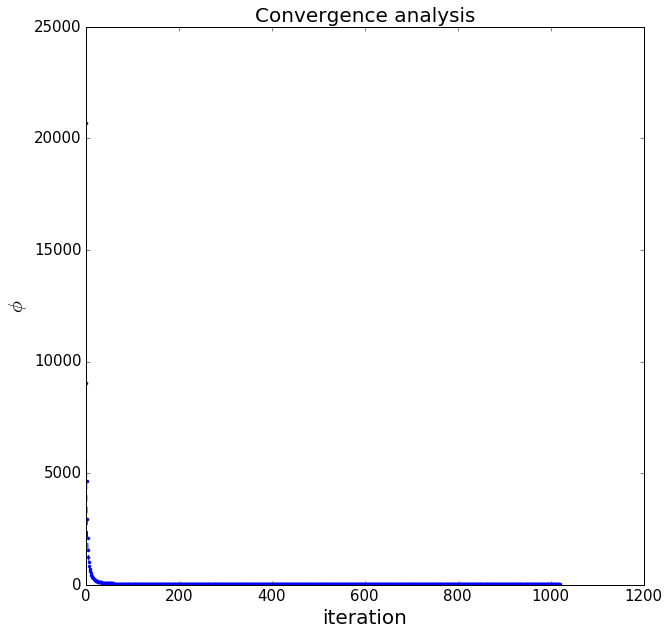

In [28]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.plot(phi, 'b--')
plt.plot(phi, 'b.')

plt.title('Convergence analysis', fontsize=title_font)
plt.xlabel('iteration', fontsize = title_font)
plt.ylabel('$\phi$', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/regular/convergence_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Estimated magnetization direction

In [29]:
print (inc_est,dec_est)

(54.846812041747064, 49.148578612769803)


In [30]:
print (inc_R,dec_R)

(55.0, 45.0)


### Comparison between observed data and predicted data

In [31]:
pred = fc.tfa_layer(reg_grid['x'],reg_grid['y'],reg_grid['z'],
                    xs,ys,zs,inc_gf,dec_gf,m_LM,inc_est,dec_est)

In [32]:
res = pred - data['tfa_obs_polyprism_RM_reg']

In [33]:
r_norm,r_mean,r_std = fc.residual(data['tfa_obs_polyprism_RM_reg'],pred)

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


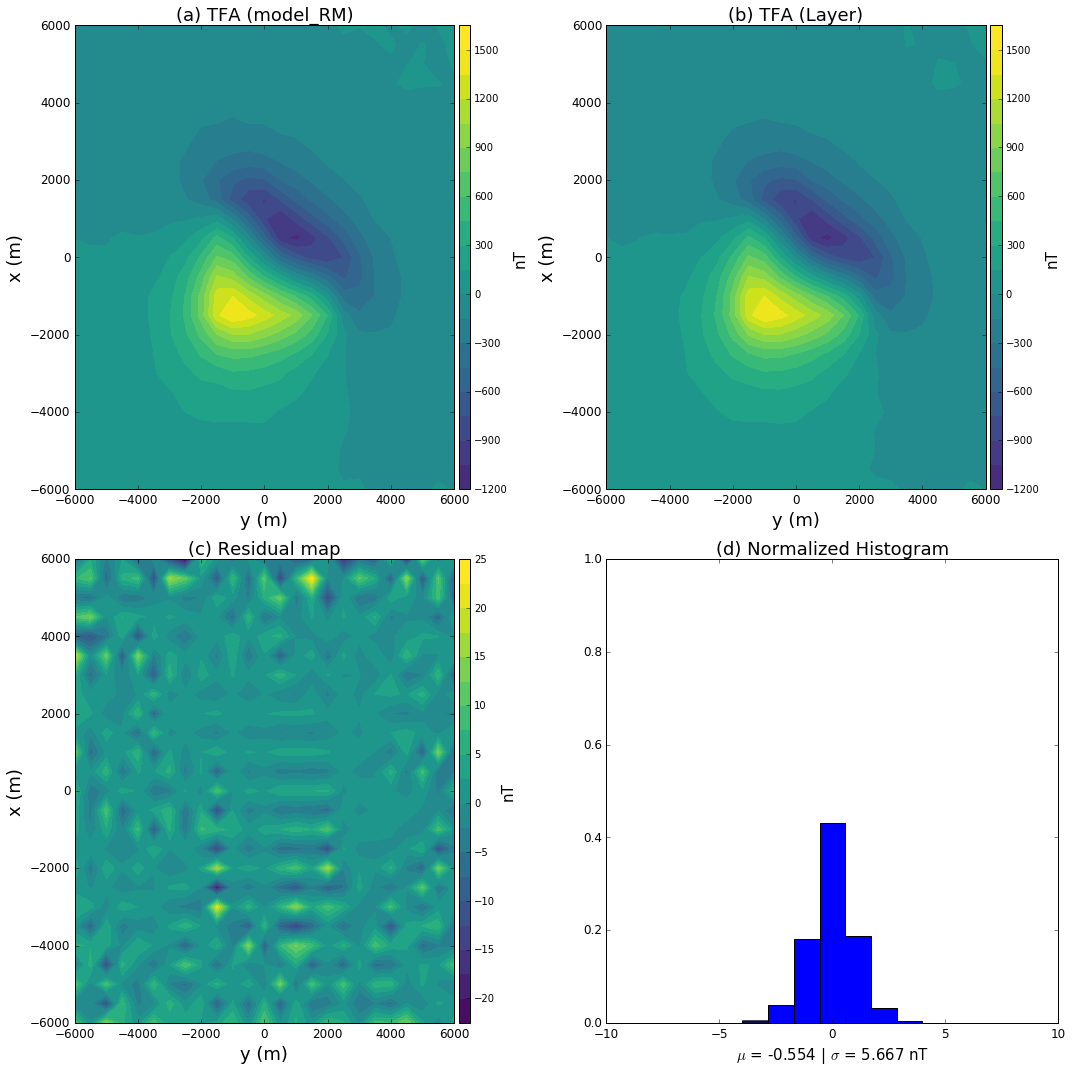

In [34]:
title_font = 18
bottom_font = 15
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(15,15), tight_layout=True)

ranges = saturation_factor*np.abs([data['tfa_obs_polyprism_RM_reg'].max(), 
                                   data['tfa_obs_polyprism_RM_reg'].min(),
                                   pred.max(), pred.min()]).max()
res_ranges = np.max(np.abs(res))

plt.subplot(2,2,1)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']), 
             data['tfa_obs_polyprism_RM_reg'].reshape(reg_grid['shape']),
             20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) TFA (model_RM)',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2,2,2)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             pred.reshape(reg_grid['shape']),
             20, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) TFA (Layer)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2,2,3)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             res.reshape(reg_grid['shape']), 
             20, cmap='viridis',  vmin=-res_ranges, vmax=res_ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(c) Residual map', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.subplot(2,2,4)
plt.xlabel('$\mu$ = %.3f | $\sigma$ = %.3f nT' % (r_mean, r_std),
           fontsize = bottom_font)
nbins = int((np.max(r_norm - np.min(r_norm))))
plt.hist(r_norm,bins=nbins,normed=True)
plt.ylim(0.,1.)
plt.xlim(-10., 10.)
plt.title('(d) Normalized Histogram',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/data_fitting_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Estimated magnetic moment within the layer

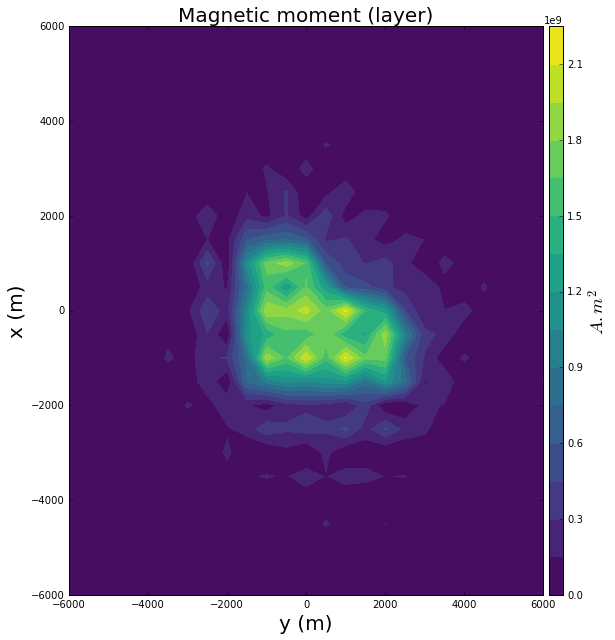

In [35]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.contourf(ys.reshape(shape_layer),xs.reshape(shape_layer), 
             m_LM.reshape(shape_layer), 20, cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('Magnetic moment (layer)', fontsize=title_font)

file_name = 'figs/regular/magnetic_moment_positive_LM_NNLS_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Reduction to the pole

In [36]:
G_rtp = fc.sensitivity_mag(reg_grid['x'],reg_grid['y'],reg_grid['z'],
                       xs,ys,zs,90.,0.,90.,0.)

In [37]:
tfa_rtp = np.dot(G_rtp,m_LM)

#### Visualization of a reduction to the pole

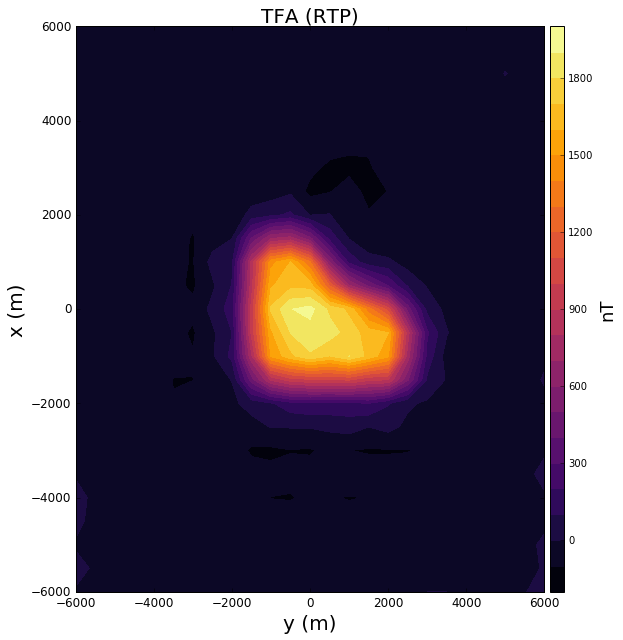

In [38]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.contourf(reg_grid['y'].reshape(reg_grid['shape']), 
             reg_grid['x'].reshape(reg_grid['shape']),
             tfa_rtp.reshape(reg_grid['shape']), 
             20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (RTP)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/RTP_reg_grid_magRM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

# Visualization of the RTP and Magnetic moment over the layer

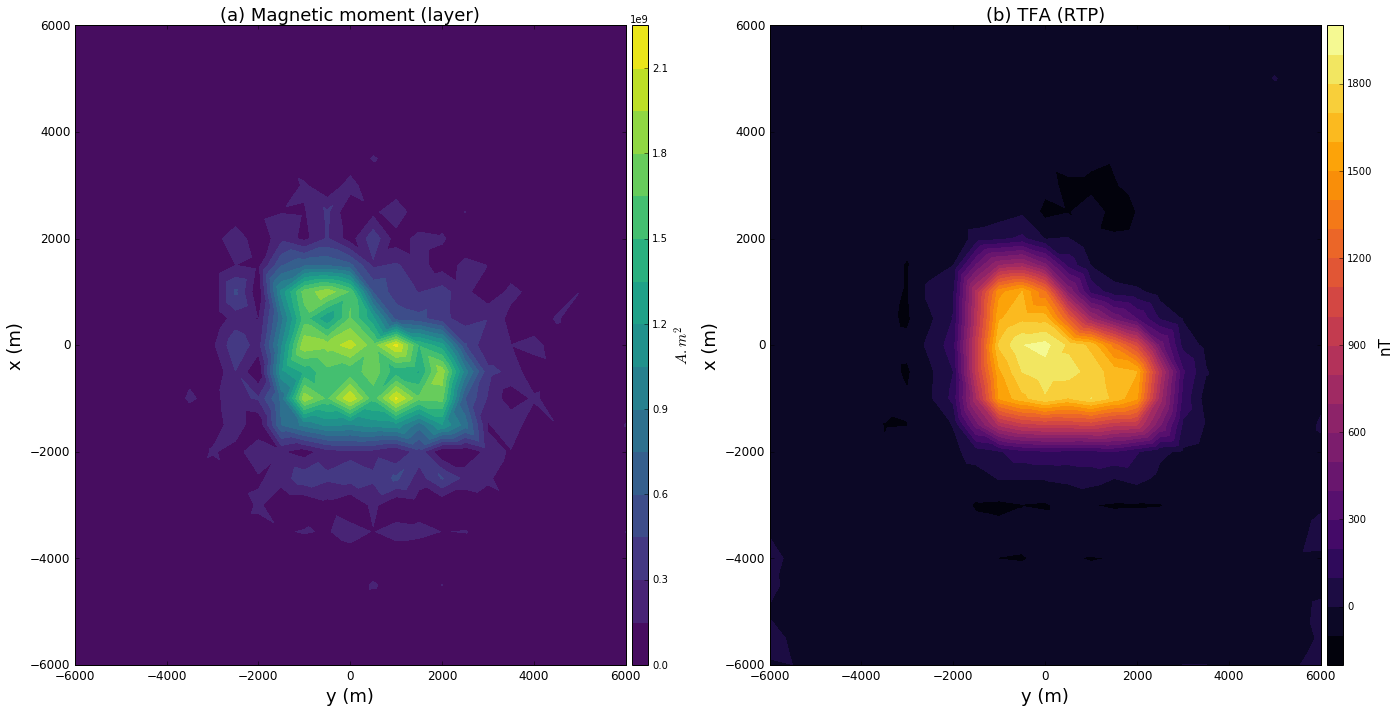

In [39]:
title_font = 18
bottom_font = 15
plt.close('all')
plt.figure(figsize=(20,10), tight_layout=True)

plt.subplot(1,2,1)
plt.tricontourf(ys,xs,m_LM,20,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) Magnetic moment (layer)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(1,2,2)
plt.tricontourf(reg_grid['y'],reg_grid['x'], tfa_rtp, 20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) TFA (RTP)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/RTP_moment_LM_NNLS_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Comparison between the RTP Calculated by equivalent layer and the true RTP field

In [40]:
r_rtp = tfa_rtp - data['tfa_obs_polyprism_PL_reg']

In [41]:
r_norm,r_mean,r_std = fc.residual(tfa_rtp,data['tfa_obs_polyprism_PL_reg'])

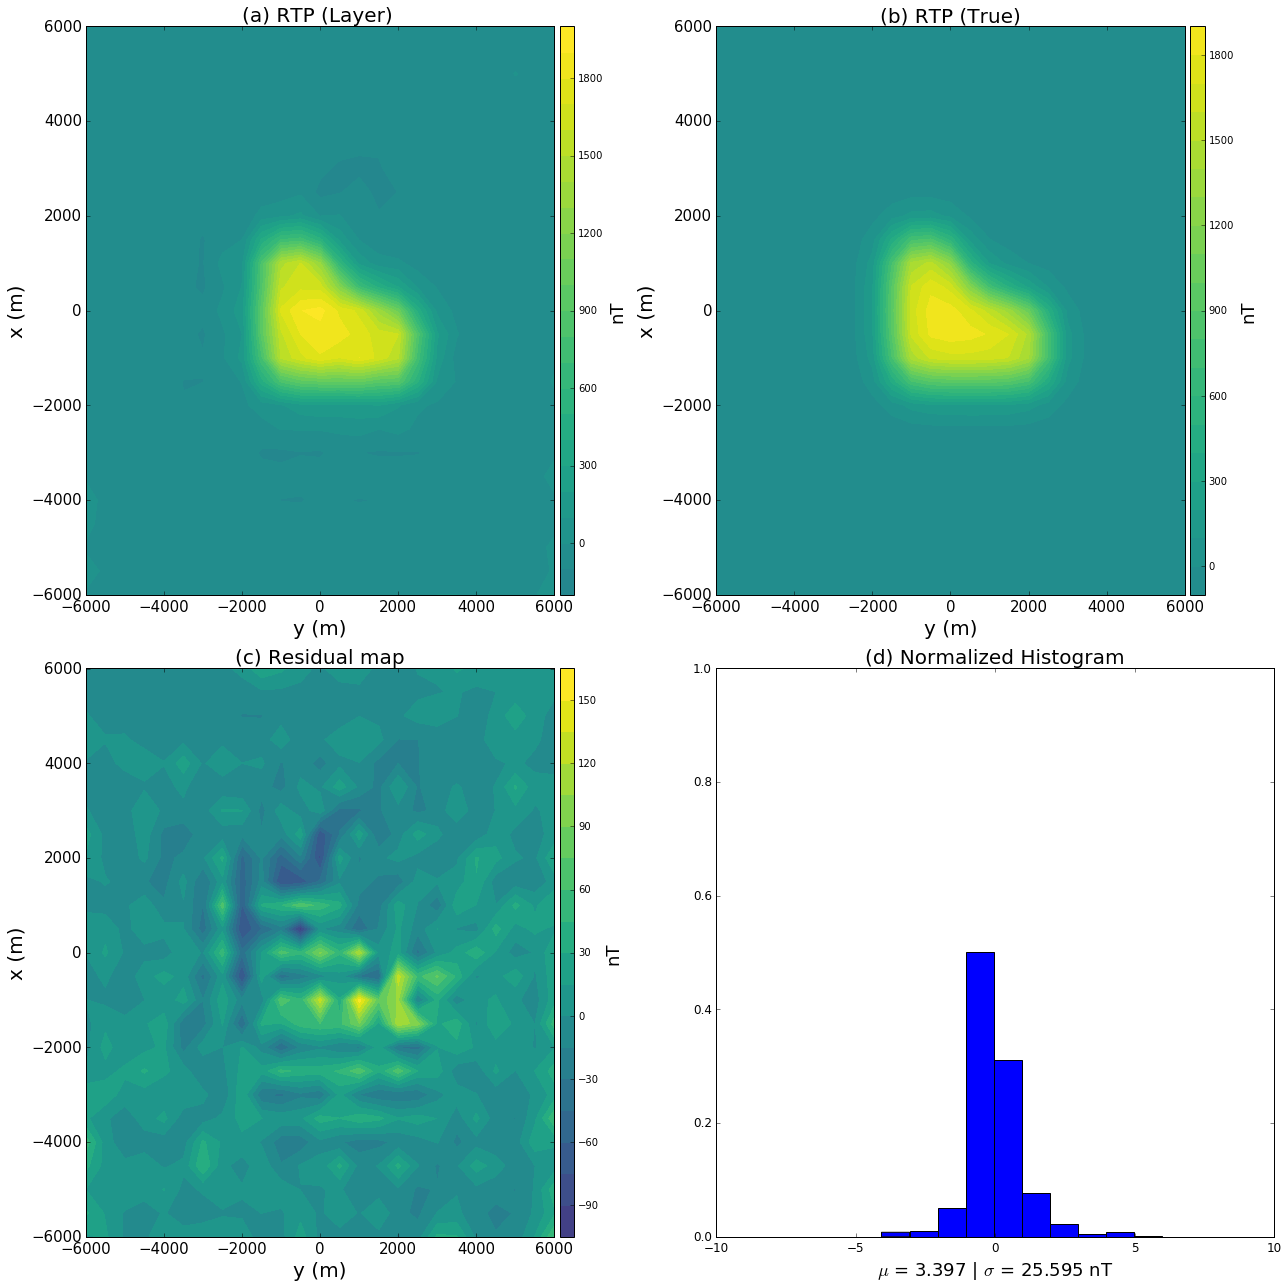

In [42]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(18,18), tight_layout=True)

ranges = saturation_factor*np.abs([tfa_rtp.max(), tfa_rtp.min(),
                                   data['tfa_obs_polyprism_PL_reg'].max(), data['tfa_obs_polyprism_PL_reg'].min()]).max()

r_ranges = saturation_factor*np.abs([r_rtp.max(), r_rtp.min()]).max()


plt.subplot(2,2,1)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']), 
             tfa_rtp.reshape(reg_grid['shape']),
             20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font) 
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) RTP (Layer) ', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             data['tfa_obs_polyprism_PL_reg'].reshape(reg_grid['shape']),
             20, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) RTP (True)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             r_rtp.reshape(reg_grid['shape']), 
             20, cmap='viridis',  vmin=-r_ranges, vmax=r_ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(c) Residual map', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)


plt.subplot(2,2,4)
plt.xlabel('$\mu$ = %.3f | $\sigma$ = %.3f nT' % (r_mean, r_std),
           fontsize = bottom_font)
nbins = int((np.max(r_norm - np.min(r_norm))))
plt.hist(r_norm,bins=nbins,normed=True)
plt.ylim(0.,1.)
plt.xlim(-10., 10.)
plt.title('(d) Normalized Histogram',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/rtp_layer_true'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Results

In [43]:
result_RM_reg['magnetic_moment'] = m_LM
result_RM_reg['inc_est'] = inc_est
result_RM_reg['dec_est'] = dec_est
result_RM_reg['layer_depth'] = h
result_RM_reg['reg_patameter'] = mu_pos
result_RM_reg['RTP'] = tfa_rtp
result_RM_reg['tfa_predicted'] = pred

#### Generating .pickle file

In [44]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_reg['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [45]:
file_name = 'data/result_RM_reg.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_reg, f)
    
saved_files.append(file_name)


### Saved files

In [46]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/regular/convergence_LM_NNLS_magRM.png
2  figs/regular/convergence_LM_NNLS_magRM.eps
3  figs/regular/data_fitting_LM_NNLS_magRM.png
4  figs/regular/data_fitting_LM_NNLS_magRM.eps
5  figs/regular/magnetic_moment_positive_LM_NNLS_magRM.png
6  figs/regular/magnetic_moment_positive_LM_NNLS_magRM.eps
7  figs/regular/RTP_reg_grid_magRM.png
8  figs/regular/RTP_reg_grid_magRM.eps
9  figs/regular/RTP_moment_LM_NNLS_RM.png
10  figs/regular/RTP_moment_LM_NNLS_RM.eps
11  figs/regular/rtp_layer_true.png
12  figs/regular/rtp_layer_true.eps
13  data/result_RM_reg.pickle
